<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/Lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2, uniform, expon

# Strong Law of Large Numbers

The following illustrates that the sample mean, $\bar{X}_{n}$, converges almost surely to $\mu$ for the Uniform distribution.

In [ ]:
def mean_uniform(n):
  x = np.random.uniform(0,1,(n,))
  return np.mean(x)

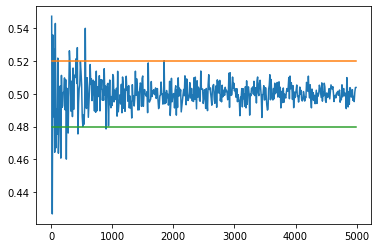

In [ ]:
x_range = np.arange(10,5000,10)
plt.plot(x_range,[mean_uniform(n) for n in x_range])
epsilon = 0.02
plt.plot(x_range,(0.5+epsilon)*np.ones(np.shape(x_range)))
plt.plot(x_range,(0.5-epsilon)*np.ones(np.shape(x_range)))

## Example that convergence in probability does not imply convergence almost surely

The following random variable converges in probability to 0, but does not converge almost surely to 0

In [ ]:
def example(n):
  y=0
  if np.random.uniform(0,1) < 1/n:
    y = 1
  return y    

Number of 1s when $n \in [1000,10000]$



In [16]:
x_range = np.arange(1000,10000,10)
y = [example(n) for n in x_range]
np.sum(y)

0

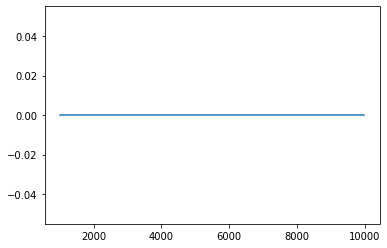

In [17]:
plt.plot(x_range,y)

Number of 1s when $n \in [10000,100000]$

In [18]:
x_range = np.arange(10000,100000,1)
y = [example(n) for n in x_range]
np.sum(y)

2

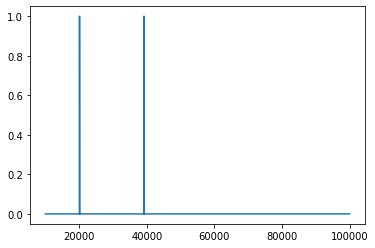

In [19]:
plt.plot(x_range,y)

# Central Limit Theorem

Take $X_{i}$ to be exponentially distributed, i.e. the pdf of $X_{i}$ is $f(x) =  \lambda e^{-\lambda x}$. Check using simulations that the distribution of $\bar{X}$ is approximately $\mathcal{N}(\frac{1}{\lambda},\frac{1}{n\lambda^{2}})$.

In [27]:
n = 5000 #sample size
s = 10000  #number of experiments
lm = 2 #lambda parameter of the exponential distribution

In [28]:
x = np.random.exponential(1/lm,(n,s))

In [29]:
#take the sample mean of each experiment 
sample_means = np.mean(x,axis=0) 

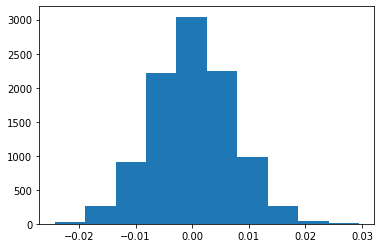

In [31]:
# sample_mean - 1/lm converges to zero
plt.hist(sample_means-1/lm)
plt.show()

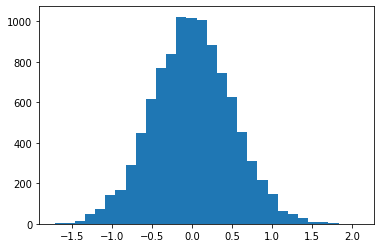

In [33]:
#but sqrt(n)*(sample mean - 1/lm) converges to?
plt.hist(np.sqrt(n)*(sample_means-1/lm),bins=30)
plt.show()

According to the CLT, $\sqrt{n}(\bar{X}-\frac{1}{\lambda}) \rightarrow_{d} \mathcal{N}(0,\frac{1}{\lambda^{2}})$, where $E[X] =  \frac{1}{\lambda}$ and $\text{Var}(X)=\frac{1}{\lambda^{2}}$. 

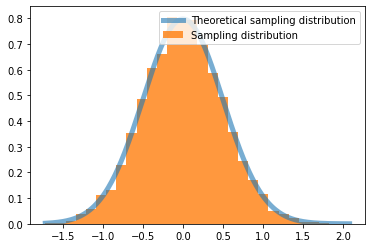

In [36]:
#Compare with the theoretical sampling density
y = np.sqrt(n)*(sample_means-1/lm)
z = np.arange(min(y),max(y),0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(z,norm.pdf(z, 0, np.sqrt(1/lm**2)),lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(y,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

# Asymptotic approximation

The asymptotic approximation for the distribution of $\bar{X}$ is  $\bar{X} \sim \mathcal{N}(\frac{1}{\lambda},\frac{1}{n\lambda^{2}})$.

In [64]:
n = 50 #sample size
s = 10000  #number of experiments
lm = 0.5 #lambda parameter of the exponential distribution
x = np.random.exponential(1/lm,(n,s))
sample_means = np.mean(x,axis=0) 

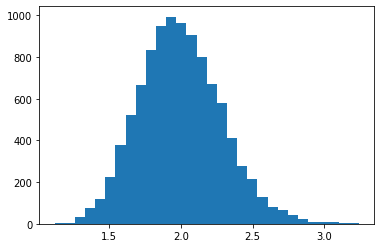

In [65]:
plt.hist(sample_means,bins=30)
plt.show()

Compare with the asymptotic approximation $\mathcal{N}(\frac{1}{\lambda},\frac{1}{n\lambda^{2}})$

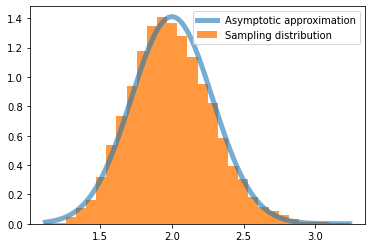

In [66]:
#Compare with the asymptotic approximation 
z = np.arange(min(sample_means),max(sample_means),0.001)
fig, ax = plt.subplots(1, 1)
ax.plot(z,norm.pdf(z, 1/lm, np.sqrt(1/(n*lm**2))),lw=5, alpha=0.6, label='Asymptotic approximation')
ax.hist(sample_means,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()